In [1]:
## Install PyStokes
!pip install pystokes

In [2]:
# ex : flow around an active colloid in an unbounded domain
%matplotlib inline
import pystokes
import numpy as np, matplotlib.pyplot as plt

In [3]:
# particle radius, fluid viscosity, and number of particles
b, eta, N = 1.0, 1.0/6.0, 1

#initialise position, orientation and body force on the colloid
r, p, F = np.array([0.0, 0.0, 0.0]), np.array([0.0, 1.0, 0]),  np.array([0.0, 1.0, 0])

# irreducible coeffcients
V2s = pystokes.utils.irreducibleTensors(2, p)
V3t = pystokes.utils.irreducibleTensors(1, p)

In [4]:
# space dimension , extent , discretization
dim, L, Ng = 3, 10, 100;

# instantiate the Flow class
flow = pystokes.unbounded.Flow(radius=b, particles=N, viscosity=eta, gridpoints=Ng*Ng)
V2s

array([-0.33333333,  0.66666667,  0.        ,  0.        ,  0.        ])

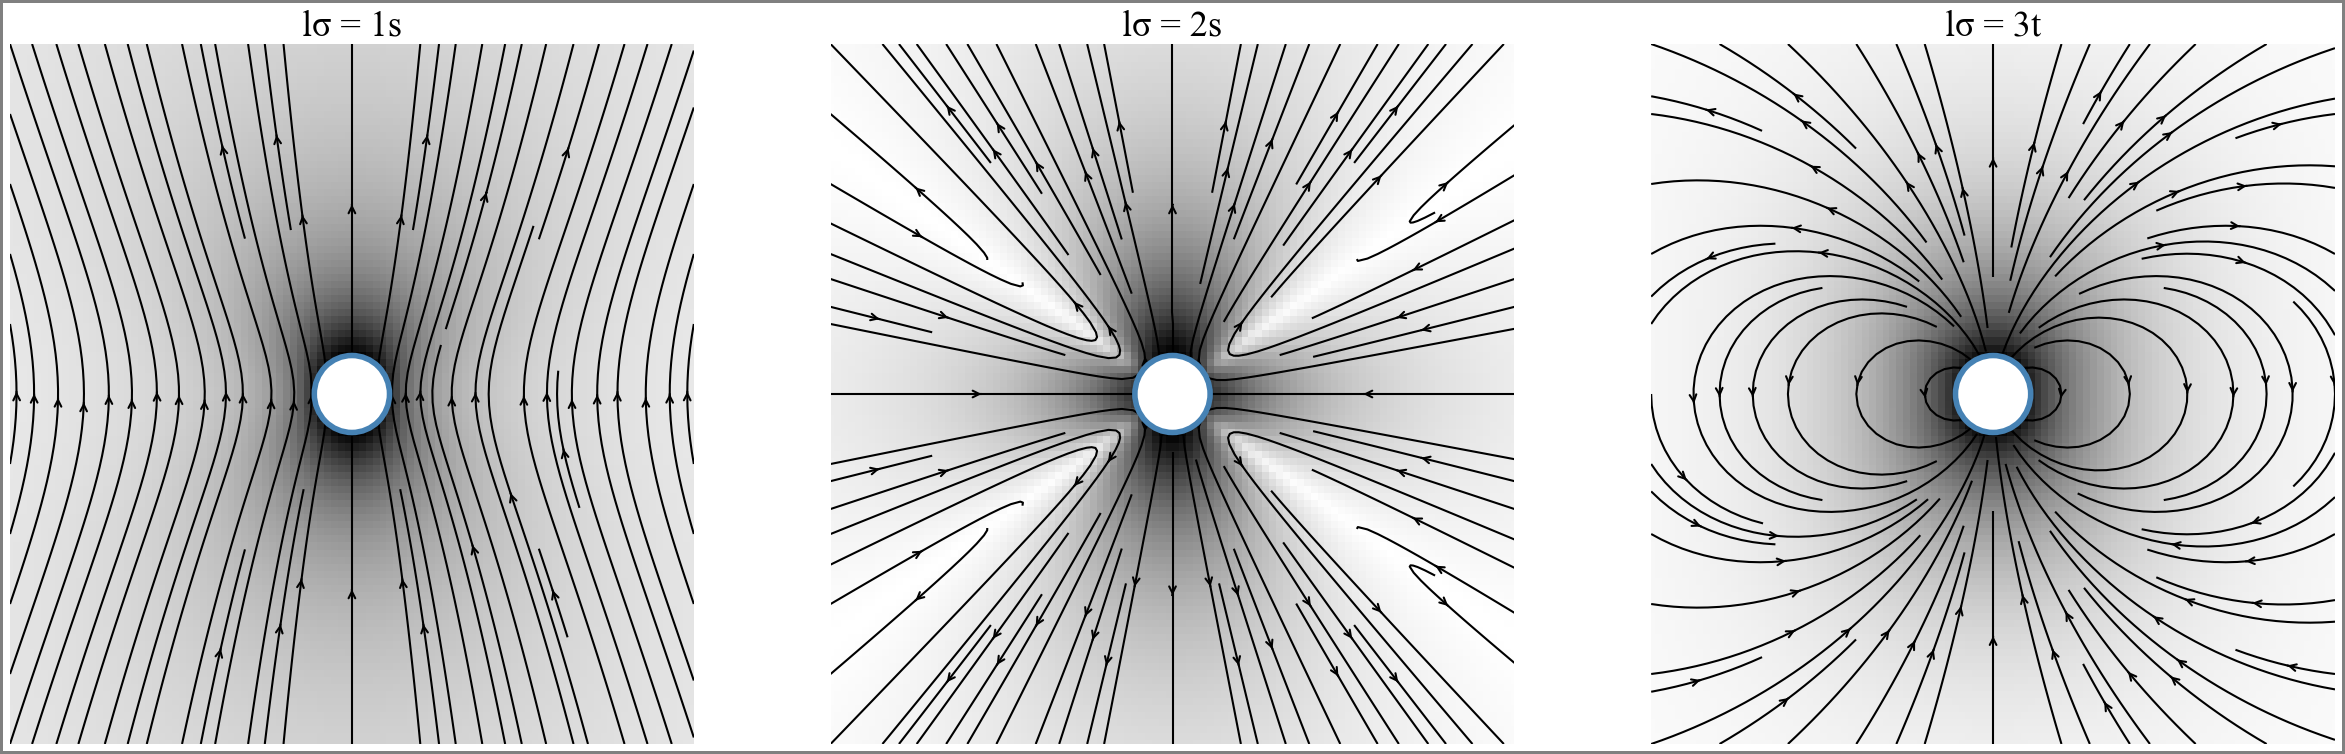

In [5]:
plt.figure(figsize=(30, 20), edgecolor='gray', linewidth=4)
plt.rcParams["font.family"] = "Times New Roman"

# create the grid
rr, vv = pystokes.utils.gridXY(dim, L, Ng)

plt.subplot(231);  vv=vv*0; 
flow.flowField1s(vv, rr, r, F)  
pystokes.utils.plotStreamlinesXY(vv, rr, r, offset=6e-1, title='lσ = 1s', density=2)

plt.subplot(232);   vv=vv*0; 
flow.flowField2s(vv, rr, r, V2s)  
pystokes.utils.plotStreamlinesXY(vv, rr, r, offset=4e-2, title='lσ = 2s', density=2)

plt.subplot(233); vv=vv*0; 
flow.flowField3t(vv, rr, r, V3t)  
pystokes.utils.plotStreamlinesXY(vv, rr, r, offset=4e-4, title='lσ = 3t', density=2)

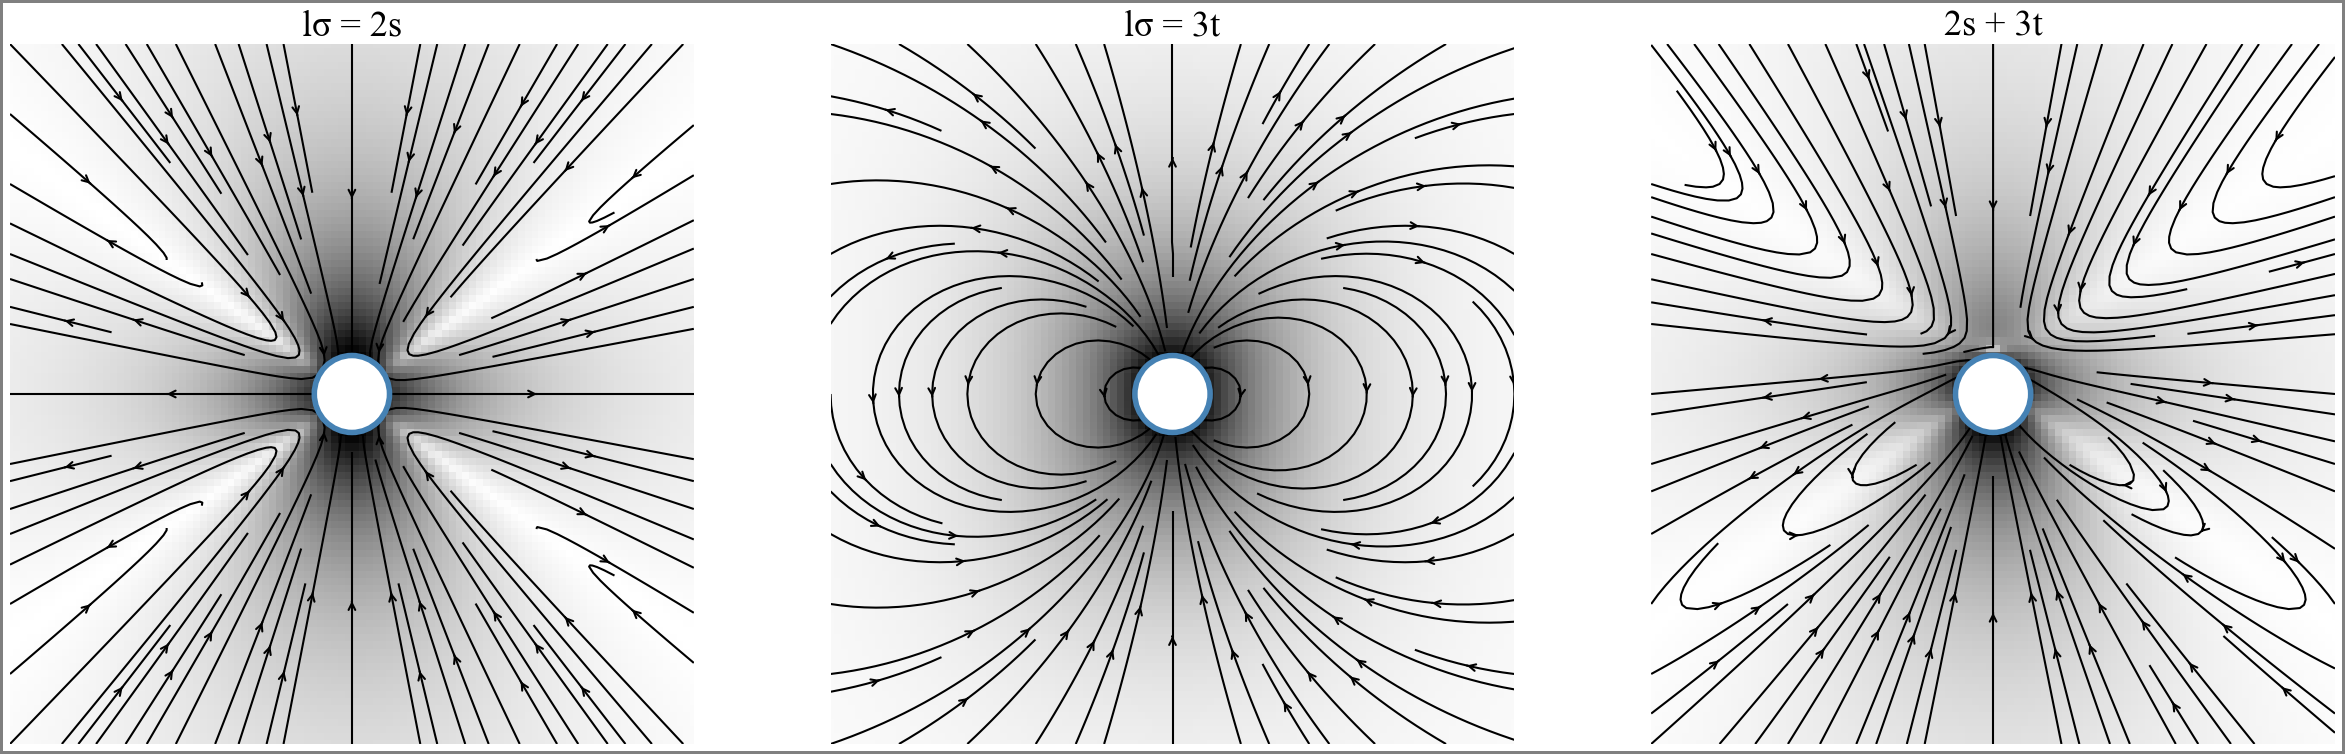

In [6]:
plt.figure(figsize=(30, 20), edgecolor='gray', linewidth=4)

# create the grid
rr, vv = pystokes.utils.gridXY(dim, L, Ng)


plt.subplot(231);   vv=vv*0; 
flow.flowField2s(vv, rr, r, -V2s)  
pystokes.utils.plotStreamlinesXY(vv, rr, r, offset=4e-2, title='lσ = 2s', density=2)

plt.subplot(232); vv=vv*0; 
flow.flowField3t(vv, rr, r, V3t)  
pystokes.utils.plotStreamlinesXY(vv, rr, r, offset=4e-4, title='lσ = 3t', density=2)


plt.subplot(233); vv=vv*0; 
flow.flowField2s(vv, rr, r, -V2s)  
flow.flowField3t(vv, rr, r, 10*V3t)  
pystokes.utils.plotStreamlinesXY(vv, rr, r, offset=4e-2, title='2s + 3t', density=2)

## CRYSTALLISATION

In [7]:
# particle radius, self-propulsion speed, number and fluid viscosity
b, vs, N, eta = 1.0, 1.0, 128, 0.1

#initialise
r = pystokes.utils.initialCondition(N)  # initial random distribution of positions
p = np.zeros(3*N); p[2*N:3*N] = -1    # initial orientation of the colloids

In [8]:
def rhs(rp):
    """
    right hand side of the rigid body motion equation
    rp: is the array of position and orientations of the colloids
    returns the \dot{rp} so that rp can be updated using an integrator
    orientations are not evolved in this example
    """
    # assign fresh values at each time step
    r = rp[0:3*N];   p = rp[3*N:6*N]
    F, v, o = np.zeros(3*N), np.zeros(3*N), np.zeros(3*N)
    
    force.lennardJonesWall(F, r, lje=0.01, ljr=5, wlje=1.2, wljr=3.4)
    rbm.mobilityTT(v, r, F)    
    
    V1s = vs*p;  V3t=0.6*V1s;
    rbm.propulsionT3t(v, r, V3t);    v = v + V1s
    return np.concatenate( (v,o) )

### Crystallization at a plane no-slip wall

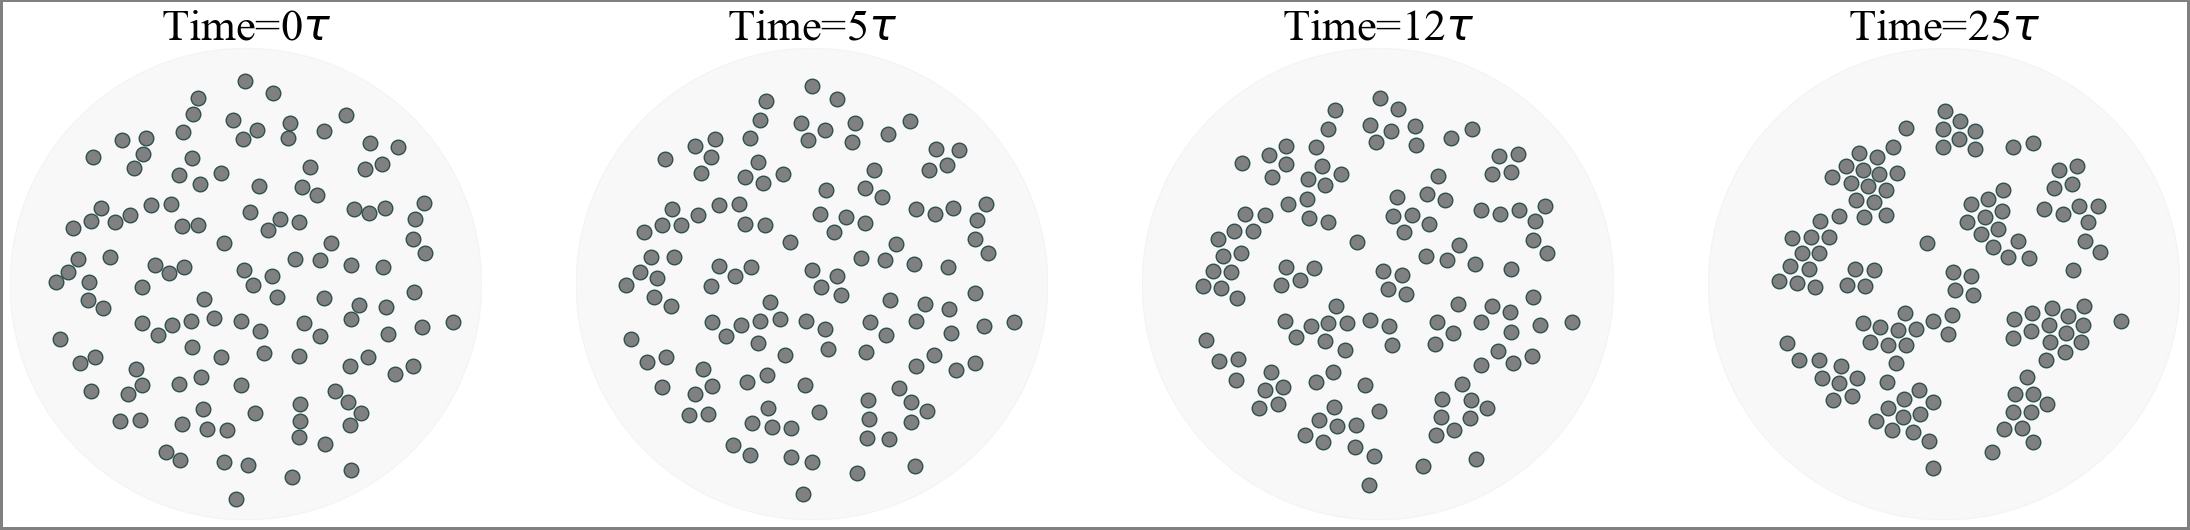

In [9]:
rbm   = pystokes.wallBounded.Rbm(radius=b, particles=N, viscosity=eta)
force = pystokes.forceFields.Forces(particles=N)

# simulate the resulting system
Tf, Nts = 25, 200
pystokes.utils.simulate(np.concatenate((r,p)), Tf,Nts,rhs,integrator='odeint', filename='crystallization')

# plot the data at specific time instants
pystokes.utils.plotConfigs(t=[1, 40, 100, 200], ms=110, tau=(Tf/Nts)/(b/vs), filename='crystallization')

###  Crystallization at a plane no-shear interface

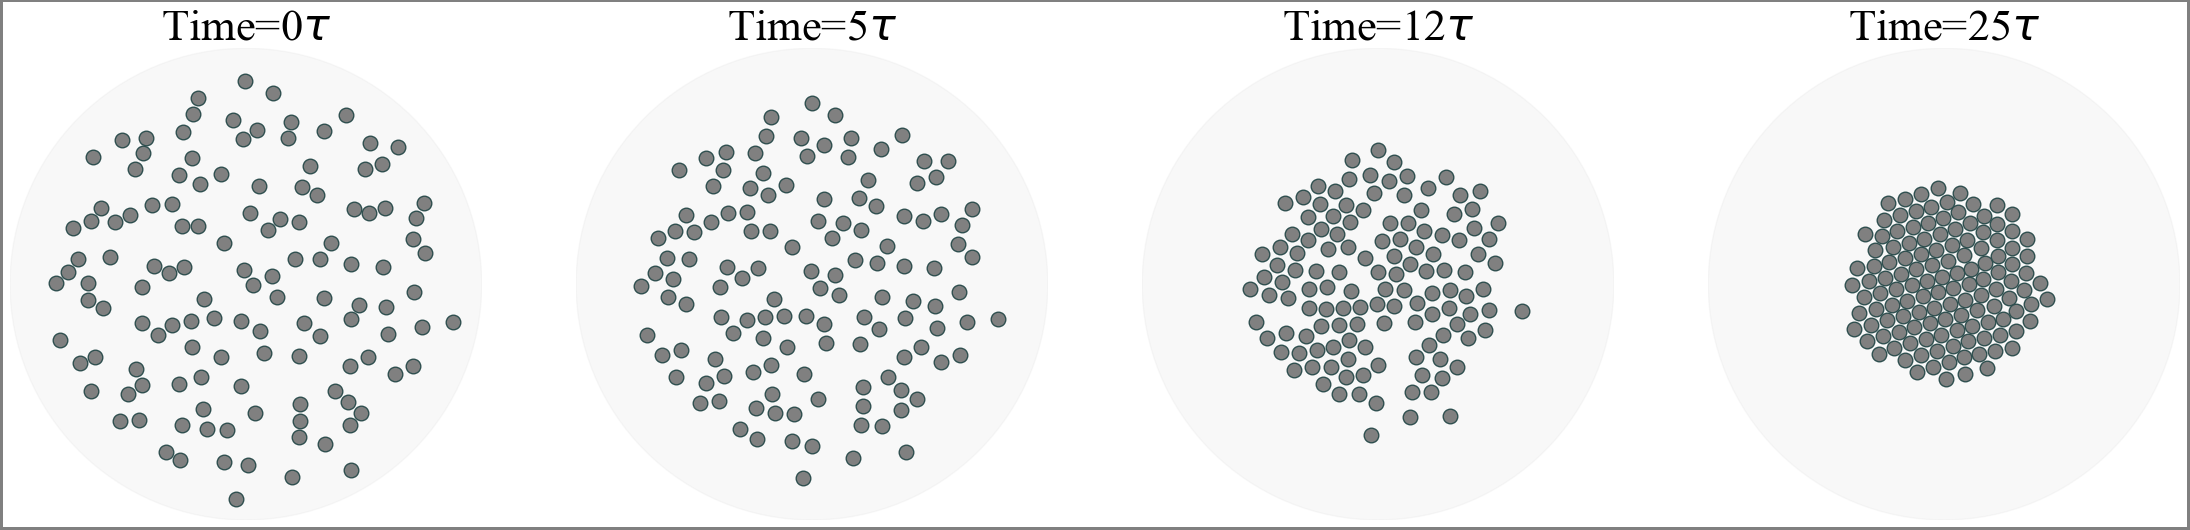

In [10]:
rbm = pystokes.interface.Rbm(radius=b, particles=N, viscosity=eta)

force = pystokes.forceFields.Forces(particles=N)

# simulate the resulting system
pystokes.utils.simulate(np.concatenate((r,p)), Tf,Nts,rhs,integrator='odeint', filename='crystallization')

# plot the data at specific time instants
pystokes.utils.plotConfigs(t=[1, 40, 100, 200], ms=110, tau=(Tf/Nts)/(b/vs), filename='crystallization')